# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [8]:
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [9]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [10]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [11]:
data

df_data = pd.DataFrame(data, columns=column_names)

df_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [12]:
from sklearn.model_selection import train_test_split


X = np.asarray(df_data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']]) 
X[0:5]
y = np.asarray(df_data['MEDV'])
y [0:5]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (404, 13) (404,)
Test set: (102, 13) (102,)


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [13]:
from sklearn.linear_model import LinearRegression
df_data_model = LinearRegression()

df_data_model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred_train = df_data_model.predict(X_train)
y_pred_test = df_data_model.predict(X_test)

# y_pred_train = df_data_model.predict(y_test)


print (y_pred_train [0:5])
print (y_train[0:5])

print (y_pred_test [0:5])
print (y_test [0:5])

[32.48868327 14.19702067 24.92799799 19.48930731 37.24234267]
[36.4 13.3 24.8 20.4 44. ]
[12.07495986 26.9894969  17.58803353 18.15584511 36.92091659]
[16.5 24.8 17.4 19.3 37.6]


## 4. Calculate and print mean squared error for both the training and the testing set.

In [15]:
from sklearn.metrics import mean_squared_error 
# Assuming: 
# - y_trainset and y_testset are the actual values for the training and testing sets. 
# - y_pred_train and y_pred_test are the predicted values for the training and testing sets. 
# Calculate MSE for training set 
mse_train = mean_squared_error(y_train, y_pred_train) 
# Calculate MSE for testing set
mse_test = mean_squared_error(y_test, y_pred_test) 
# Print the results 
print("Mean Squared Error for Training Set:", mse_train) 
print("Mean Squared Error for Testing Set:", mse_test)


Mean Squared Error for Training Set: 21.197139922226427
Mean Squared Error for Testing Set: 25.419587126821902


## 3. Calculate and print R-squared for both the training and the testing set.

In [16]:
from sklearn.metrics import r2_score 
r2_train = r2_score(y_train, y_pred_train) 
r2_test = r2_score(y_test, y_pred_test)

print(f"r^2 for training set is {r2_train}")
print(f"r^2 for testing set is {r2_test}")

r^2 for training set is 0.7415244219726307
r^2 for testing set is 0.7263451459702503


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [17]:
from sklearn.metrics import mean_absolute_error
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

print(f"mean absolute error for training set is {mae_train}")
print(f"mean error for testing set is {mae_test}")


mean absolute error for training set is 3.226962133564678
mean error for testing set is 3.3677909837965707


## Classification Model Evaluation

In [18]:
from sklearn.datasets import load_iris
data = load_iris()

In [55]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [44]:
column_names = data.feature_names


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [57]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [23]:
target = pd.DataFrame(data.target)

In [24]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [25]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [65]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


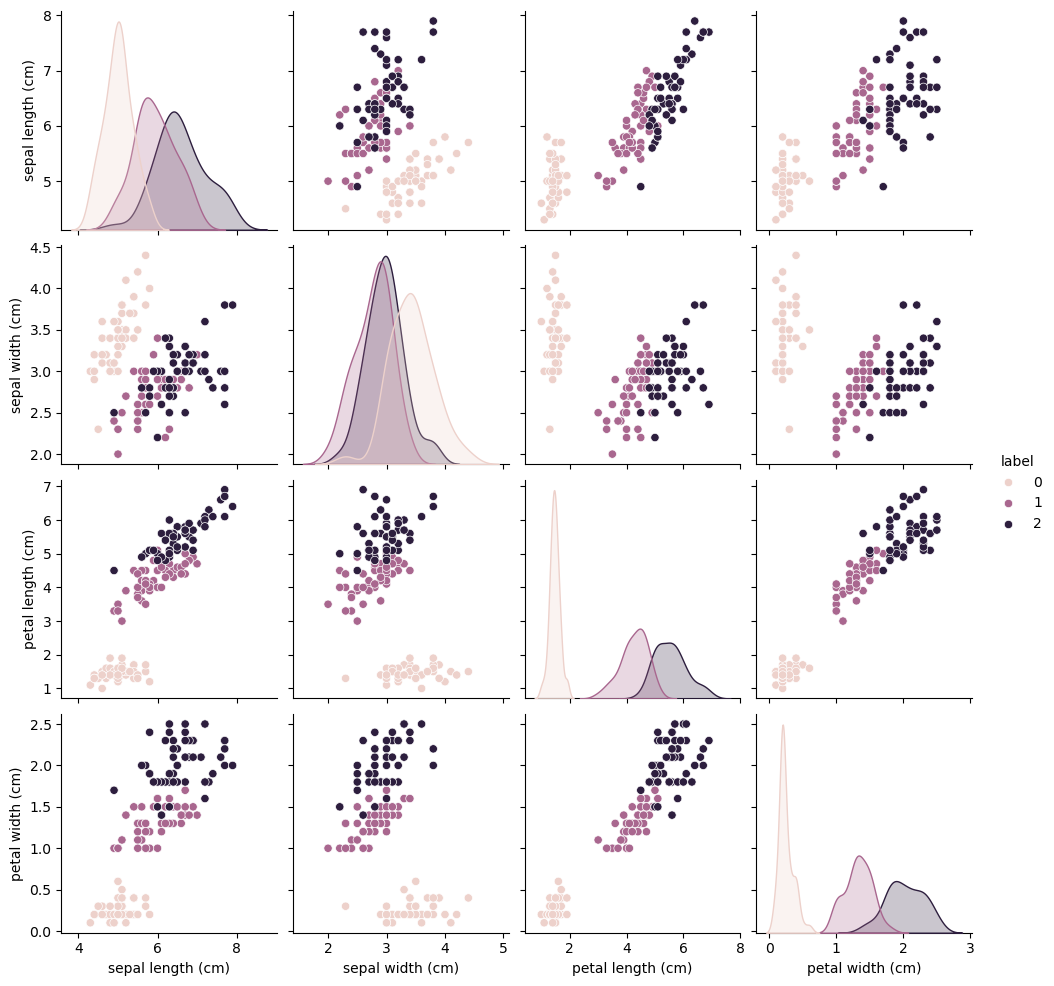

In [26]:
labels = pd.Series(data['target'],name='label')
features = pd.DataFrame(data['data'], columns = data['feature_names'])
final = pd.concat([features, labels], axis = 1)
final.tail()

import seaborn as sns
sns.pairplot(final, hue = 'label')

In [82]:
final.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [40]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [51]:
labels.describe

<bound method NDFrame.describe of 0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: label, Length: 150, dtype: int64>

In [47]:
features.describe

<bound method NDFrame.describe of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]>

In [53]:
final.describe

<bound method NDFrame.describe of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1

In [52]:

X_train, X_test, y_train, y_test = train_test_split( features, labels, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (120, 4) (120,)
Test set: (30, 4) (30,)


## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
model = LogisticRegression()

model.fit(X_train, y_train)
print(model.score(X_train, y_train))

model.fit(X_test, y_test)
print(model.score(X_test, y_test))

0.9833333333333333
0.9333333333333333


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [64]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test) 

print(y_pred_train)
print(y_pred_test)



[1 0 2 0 1 2 2 1 2 0 2 0 2 0 2 0 0 1 2 2 0 1 2 2 1 1 0 1 1 1 0 1 0 1 2 2 2
 2 0 1 2 0 1 2 0 2 2 2 2 0 2 2 2 0 2 1 2 1 2 1 2 2 1 2 2 1 1 0 2 0 2 0 1 1
 1 1 0 2 2 1 0 1 0 0 2 2 0 0 0 2 0 0 2 2 1 0 0 0 2 2 0 0 2 2 2 0 0 2 1 1 1
 2 2 2 2 2 1 2 2 2]
[2 0 2 2 2 1 2 0 0 2 0 0 0 2 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2]


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [68]:
from sklearn.metrics import balanced_accuracy_score

balanced_acc_train = balanced_accuracy_score(y_train, y_pred_train)
balanced_acc_test = balanced_accuracy_score(y_test, y_pred_test)

print("Balanced Accuracy:", balanced_acc_train)
print("Balanced Accuracy:", balanced_acc_test)


Balanced Accuracy: 0.8652213188798554
Balanced Accuracy: 0.8666666666666667


## 10. Calculate and print the precision score for both the training and the testing set.

In [70]:
from sklearn.metrics import precision_score

# Step 1: Make predictions for training and testing sets
# is above calculated

# Step 2: Calculate precision for training and testing sets
# Use average='binary' for binary classification, or average='weighted' for multiclass
precision_train = precision_score(y_train, y_pred_train, average='weighted')
precision_test = precision_score(y_test, y_pred_test, average='weighted')

# Step 3: Print results
print("Precision Score for Training Set:", precision_train)
print("Precision Score for Testing Set:", precision_test)

Precision Score for Training Set: 0.8728038061102577
Precision Score for Testing Set: 0.9454545454545454


## 11. Calculate and print the recall score for both the training and the testing set.

In [72]:
from sklearn.metrics import recall_score
recall_train = recall_score(y_train, y_pred_train, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')

print("Recall Score for Training Set:", recall_train)
print("Recall Score for Testing Set:", recall_test)

Recall Score for Training Set: 0.85
Recall Score for Testing Set: 0.9333333333333333


## 12. Calculate and print the F1 score for both the training and the testing set.

In [74]:
from sklearn.metrics import f1_score
f1_train = f1_score(y_train, y_pred_train, average='weighted') 
f1_test = f1_score(y_test, y_pred_test, average='weighted') 

print("F1 score for Training Set:", f1_train)
print("F1 score for Testing Set:", f1_test)

F1 score for Training Set: 0.845937579455886
F1 score for Testing Set: 0.9283333333333333


## 13. Generate confusion matrices for both the training and the testing set.

Confusion Matrix for Training Set:
 [[34  0  0]
 [ 1 29 15]
 [ 0  2 39]]
Confusion Matrix for Testing Set:
 [[16  0  0]
 [ 0  3  2]
 [ 0  0  9]]


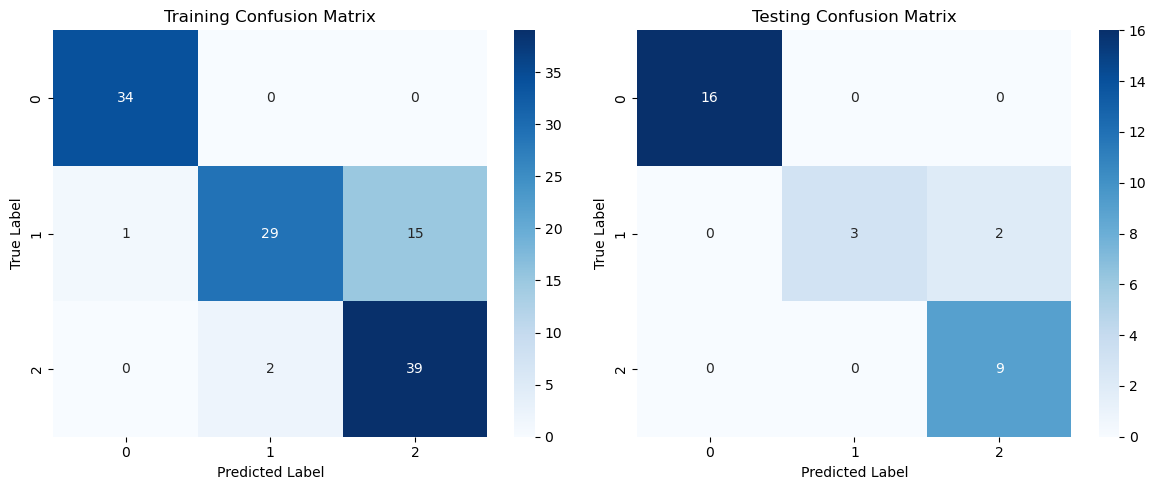

In [81]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Step 2: Generate confusion matrices
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Step 3: Print or visualize the confusion matrices
print("Confusion Matrix for Training Set:\n", cm_train)
print("Confusion Matrix for Testing Set:\n", cm_test)

# Visualize the confusion matrices using heatmaps
plt.figure(figsize=(12, 5))

# Training confusion matrix
plt.subplot(1, 2, 1)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title("Training Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Testing confusion matrix
plt.subplot(1, 2, 2)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Testing Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.tight_layout()
plt.show()

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

# Classification with SVM / Kfolding 

In [87]:
# Import necessary libraries
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Step 1: Load the data
# Assuming your DataFrame is called 'final'
X = final[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = final['label']

# Step 2: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Set up Stratified k-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds

# Step 4: Initialize the SVM model
svm_model = SVC(kernel='rbf', random_state=42)

# Step 5: Perform Cross-Validation
cv_scores = cross_val_score(svm_model, X_scaled, y, cv=kf, scoring='accuracy')

# Step 6: Print Cross-Validation Results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores):.2f}")
print(f"Standard Deviation: {np.std(cv_scores):.2f}")

# Optional: Train and Evaluate on Entire Dataset
# Train the model on all data for final predictions
svm_model.fit(X_scaled, y)
y_pred = svm_model.predict(X_scaled)

# Print classification report and confusion matrix
print("\nClassification Report (Trained on All Data):")
print(classification_report(y, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y, y_pred))

Cross-Validation Accuracy Scores: [1.         0.96666667 0.9        1.         0.9       ]
Mean Accuracy: 0.95
Standard Deviation: 0.05

Classification Report (Trained on All Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.96      0.96        50
           2       0.96      0.96      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150


Confusion Matrix:
[[50  0  0]
 [ 0 48  2]
 [ 0  2 48]]


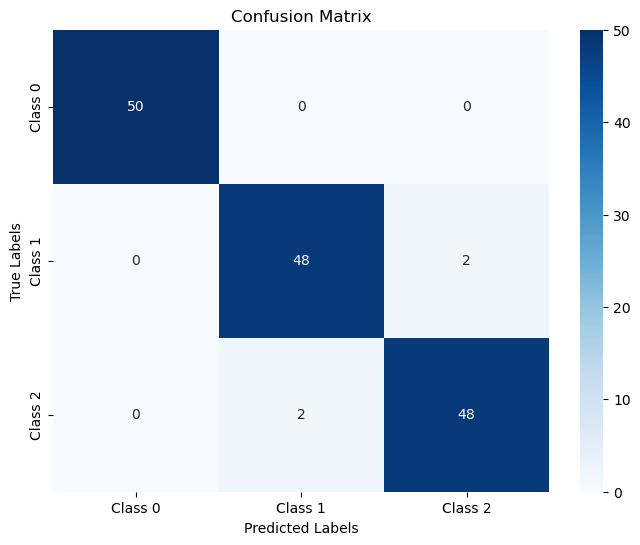

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_true and y_pred contain true and predicted labels
def plot_confusion_matrix(y_true, y_pred, class_names):
    """
    Visualizes the confusion matrix using a heatmap.
    
    Parameters:
    y_true: array-like, true class labels
    y_pred: array-like, predicted class labels
    class_names: list, names of the classes
    """
    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Create a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Example usage after training the model
# Replace `y` and `y_pred` with your true and predicted labels
class_names = ['Class 0', 'Class 1', 'Class 2']  # Replace with your actual class names if available
plot_confusion_matrix(y, y_pred, class_names)

Training Set Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       0.96      0.98      0.97        47
           2       0.98      0.96      0.97        47

    accuracy                           0.98       142
   macro avg       0.98      0.98      0.98       142
weighted avg       0.98      0.98      0.98       142


Testing Set Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      0.67      0.80         3
           2       0.75      1.00      0.86         3

    accuracy                           0.88         8
   macro avg       0.92      0.89      0.89         8
weighted avg       0.91      0.88      0.87         8



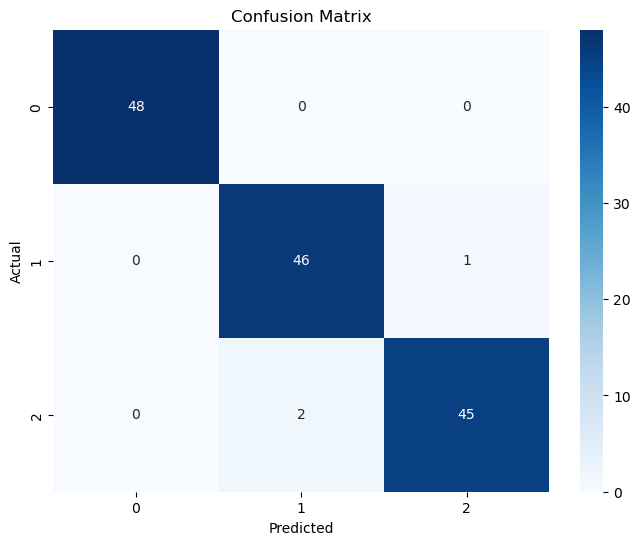

In [92]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the data
# Assuming your DataFrame is called 'final'
X = final[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = final['label']

# Step 2: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42, stratify=y)

# Step 3: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train the SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Step 5: Make predictions
y_train_pred = svm_model.predict(X_train_scaled)
y_test_pred = svm_model.predict(X_test_scaled)

# Step 6: Evaluate the model
print("Training Set Evaluation:")
print(classification_report(y_train, y_train_pred))

print("\nTesting Set Evaluation:")
print(classification_report(y_test, y_test_pred))

# Step 7: Confusion Matrix
cm = confusion_matrix(y_train, y_train_pred)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

